In [2]:
!pip install pandas numpy matplotlib


In [1]:
import pandas as pd
import numpy as np

# Read the CSV file

analysis_date = "2025-01-05"
df = pd.read_csv(f"heatpump-{analysis_date}.csv")

# Display the first few rows to verify the data
df.head()

,Timestamp,Frostschutz,HKPumpeAktiv,HKSupplyTemp,HKTargetSupplyTemp,HKWunschTemp,HeizKurveNeigung,HeizkurveNiveau,KompressorPhase,KompressorStatus,AussenTemperatur,SpeicherTemp,SupplyTempPrimaryCircuit,VerbrauchHeute,VolumenStrom,WERücklauf,WEVorlauf
0,2025-01-05T00:00:05.535698,0,1,49.5,45.2,19.0,1.2,0,ready,0,-0.5,49.2,0.7,0.0,1886,34.8,34.5
1,2025-01-05T00:01:05.000243,0,1,49.5,45.2,19.0,1.2,0,ready,0,-0.5,49.2,0.7,0.0,1884,34.3,34.5
2,2025-01-05T00:02:04.307337,0,1,49.5,45.2,19.0,1.2,0,ready,0,-0.5,49.2,0.7,0.0,1877,34.3,34.5
3,2025-01-05T00:03:04.553887,0,1,49.5,45.2,19.0,1.2,0,ready,0,-0.5,49.2,0.7,0.0,1881,34.3,34.5
4,2025-01-05T00:04:04.953366,0,1,49.5,45.2,19.0,1.2,0,ready,0,-0.5,49.2,0.7,0.0,1875,34.3,34.5


# Convert data

In [2]:
# Fix Typo
# df = df.drop('WePumpe',axis=1)

In [3]:
df['HKWunschTemp1'] = pd.to_numeric(df['HKWunschTemp'], errors='coerce')
df['Timestamp'] = pd.to_datetime(df.Timestamp)
# Convert from UTC to MET
df['Timestamp'] = df['Timestamp'] + pd.Timedelta(hours=1)
df['TimeOnly'] = df.Timestamp.dt.strftime('%H:%M:%S')
df['WEPumpe'] = (df.VolumenStrom > 300.0).astype(int)
df.describe(include='all')

,Timestamp,Frostschutz,HKPumpeAktiv,HKSupplyTemp,HKTargetSupplyTemp,HKWunschTemp,HeizKurveNeigung,HeizkurveNiveau,KompressorPhase,KompressorStatus,AussenTemperatur,SpeicherTemp,SupplyTempPrimaryCircuit,VerbrauchHeute,VolumenStrom,WERücklauf,WEVorlauf,HKWunschTemp1,TimeOnly,WEPumpe
count,691,691.0,691.0,691.000000,691.000000,691.000000,6.910000e+02,691.0,691,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691,691.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ready,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:33:04,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,2025-01-05 06:46:41.094356992,0.0,1.0,41.153401,46.595658,19.756874,1.200000e+00,0.0,NaN,0.532562,-0.352388,41.122287,0.327786,9.501013,1872.222865,36.336903,38.799566,19.756874,NaN,1.0
min,2025-01-05 01:00:05.535698,0.0,1.0,21.500000,42.700000,18.000000,1.200000e+00,0.0,NaN,0.000000,-1.200000,21.300000,-2.100000,0.000000,1812.000000,21.100000,22.000000,18.000000,NaN,1.0
25%,2025-01-05 03:52:34.626575872,0.0,1.0,35.500000,42.700000,18.000000,1.200000e+00,0.0,NaN,0.000000,-0.700000,35.600000,-0.300000,0.000000,1863.000000,28.300000,28.500000,18.000000,NaN,1.0
50%,2025-01-05 06:47:04.585423104,0.0,1.0,43.500000,46.200000,20.000000,1.200000e+00,0.0,NaN,1.000000,-0.200000,43.400000,0.700000,5.900000,1872.000000,36.100000,41.000000,20.000000,NaN,1.0
75%,2025-01-05 09:40:34.522384128,0.0,1.0,48.000000,51.100000,22.000000,1.200000e+00,0.0,NaN,1.000000,-0.100000,48.150000,0.700000,16.650000,1881.000000,43.900000,47.950000,22.000000,NaN,1.0
max,2025-01-05 12:33:04.061695,0.0,1.0,54.500000,52.100000,22.000000,1.200000e+00,0.0,NaN,1.000000,1.000000,54.600000,9.500000,29.200000,1961.000000,52.900000,56.500000,22.000000,NaN,1.0


# Plots

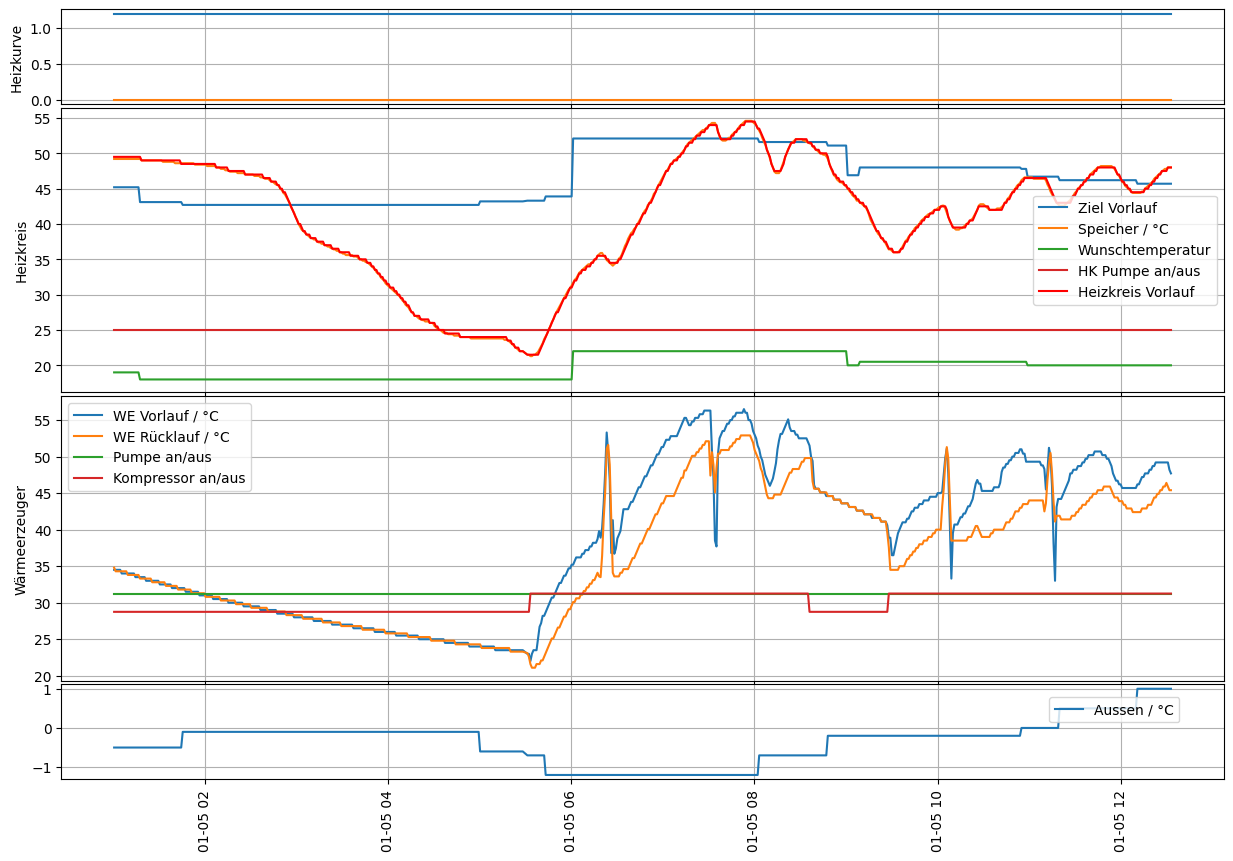

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(4,1, height_ratios=[1,3,3,1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# fig, (ax1,ax2,ax3) =plt.subplots(3,1, figsize=(12,10), sharex=True)

ax = ax1
ax.plot(df.Timestamp, df.HeizKurveNeigung, label='Neigung')
ax.plot(df.Timestamp, df.HeizkurveNiveau, label='Niveau')
ax.set_ylabel('Heizkurve')
ax.grid(True)

ax = ax2
ax.plot(df.Timestamp, df.HKTargetSupplyTemp, label='Ziel Vorlauf')
ax.plot(df.Timestamp, df.SpeicherTemp, label='Speicher / °C')
ax.plot(df.Timestamp, df.HKWunschTemp1, label='Wunschtemperatur')
ax.plot(df.Timestamp, df.HKPumpeAktiv*5+20, label='HK Pumpe an/aus')
ax.plot(df.Timestamp, df.HKSupplyTemp, label='Heizkreis Vorlauf', color='red')
ax.set_ylabel('Heizkreis')
ax.grid(True)

# Turn off x-axis label and ticks for the upper subplot (ax1)
ax.set_xlabel('')  # Remove the x-axis label
ax.set_xticklabels([])  # Remove x-axis tick labels

ax.legend()

ax = ax3
ax.plot(df.Timestamp, df.WEVorlauf, label='WE Vorlauf / °C')
ax.plot(df.Timestamp, df.WERücklauf, label='WE Rücklauf / °C')
ax.plot(df.Timestamp, df.WEPumpe*2.5 + 30-1.25, label='Pumpe an/aus')
ax.plot(df.Timestamp, df.KompressorStatus*2.5 + 30-1.25, label='Kompressor an/aus')
ax.set_ylabel('Wärmeerzeuger')
ax.grid(True)
ax.legend()

# Turn off x-axis label and ticks for the upper subplot (ax1)
ax.set_xlabel('')  # Remove the x-axis label
ax.set_xticklabels([])  # Remove x-axis tick labels

ax = ax4
ax4.plot(df.Timestamp, df.AussenTemperatur, label='Aussen / °C')

plt.subplots_adjust(hspace=0.02) 
plt.legend(loc=(0.85,0.6))
plt.grid(True)
plt.xticks(rotation=90)
plt.savefig(f"{analysis_date}.png", format='png', dpi=300, bbox_inches='tight')
plt.show()